In [21]:
from config import *

import gensim

import glob
import os
import re

import numpy as np
import pandas as pd

import json

In [2]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

from gensim.models import ldamodel

In [3]:
THEME = 'GDP'

In [4]:
# Load dictionary and corpus
dictionary_all = gensim.corpora.Dictionary.load(TEMP_PATH + '/%s/%s_less_restricted.dict' % (THEME, THEME))

2021-04-25 23:32:55,513 : INFO : loading Dictionary object from /work/ms5941/NLP/Temp/GDP/GDP_less_restricted.dict
2021-04-25 23:32:55,519 : INFO : Dictionary lifecycle event {'fname': '/work/ms5941/NLP/Temp/GDP/GDP_less_restricted.dict', 'datetime': '2021-04-25T23:32:55.518595', 'gensim': '4.0.1', 'python': '3.7.7 (default, May  7 2020, 21:25:33) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-16-amd64-x86_64-with-debian-10.9', 'event': 'loaded'}


In [ ]:
# 1. Look for ids of related words to theme in the dictionary. This will be a list of ids for each year.
# 

In [5]:
words = pd.read_csv(TEMP_PATH + '/%s_words.csv' % THEME.lower(), index_col=0)

In [6]:
year_name_list = dict()
year_id_list = dict()
for col in words.columns:
    reqd_words = list(words[col].values) + [THEME.lower()]
    reqd_ids = [k for k,v in dictionary_all.items() if v in reqd_words]
    year_name_list[col] = [dictionary_all[i] for i in reqd_ids]
    year_id_list[col] = reqd_ids

In [7]:
year_name_list

{'1996': ['inflation',
  'figure',
  'gdp',
  'economists',
  'unemployment',
  'gross',
  'cpi'],
 '1997': ['consumption',
  'deficit',
  'inflation',
  'gdp',
  'unemployment',
  'gross',
  'cpi'],
 '1998': ['consumption',
  'deficit',
  'inflation',
  'gdp',
  'employment',
  'unemployment',
  'cpi',
  'eci'],
 '1999': ['deficit',
  'inflation',
  'gdp',
  'payrolls',
  'employment',
  'unemployment',
  'cpi'],
 '2000': ['inflation',
  'gdp',
  'payrolls',
  'revised',
  'economists',
  'employment',
  'cpi',
  'pmi'],
 '2001': ['consumption',
  'inflation',
  'figure',
  'gdp',
  'payrolls',
  'revised',
  'employment',
  'gross',
  'reading',
  'cpi'],
 '2002': ['consumption',
  'inflation',
  'gdp',
  'payrolls',
  'employment',
  'gross',
  'reading',
  'cpi'],
 '2003': ['inflation', 'gdp', 'payrolls', 'jobless'],
 '2004': ['inflation', 'output', 'gdp', 'payrolls', 'jobs', 'cpi', 'pmi'],
 '2005': ['inflation',
  'output',
  'gdp',
  'payrolls',
  'jobless',
  'factory',
  'cpi']

In [9]:
years = [str(year) for year in range(START_YEAR, END_YEAR + 1)]

In [10]:
good_words_count_per_year = dict()
for year in years:
    good_words_count_per_year[year] = []
    with open(TOKENIZED_ARTICLES_PATH % (THEME, THEME, year)) as f:
        a = json.load(f)
        for article in a:
            good_words_count_per_year[year].append(len([word for word in article if word in year_name_list[year]]))
    print(TOKENIZED_ARTICLES_PATH % (THEME, THEME, year), 'done!')

/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_1996.json done!
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_1997.json done!
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_1998.json done!
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_1999.json done!
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_2000.json done!
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_2001.json done!
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_2002.json done!
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_2003.json done!
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_2004.json done!
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_2005.json done!
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_2006.json done!
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_2007.json done!
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_2008.json done!
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_2009.json done!
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_2010.json done!
/work/ms5941/NLP/Temp/GDP

In [12]:
theme = 'GDP'

yearly_slices = []
for year in years:
    # Get the 1% threshold count (the top 1% of most relevant articles)
    x = good_words_count_per_year[year]
    x.sort()
    threshold = x[-int(len(x)*0.01):][0]
    year_article_count = 0
    with open(TOKENIZED_ARTICLES_PATH % (theme, theme, year)) as f:
        article_index = 0
        all_articles = json.load(f)
        for articles in all_articles:
            if good_words_count_per_year[year][article_index] >= threshold:
                year_article_count += 1    
            article_index += 1
    yearly_slices.append(year_article_count)
    print(TOKENIZED_ARTICLES_PATH % (theme, theme, year), 'done!')
    print('Count for the year:', year_article_count, 'Vs original:', len(all_articles))

# dictionary_all = gensim.corpora.Dictionary.load(TEMP_PATH + '/%s/%s_less_restricted.dict' % (theme, theme))

/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_1996.json done!
Count for the year: 313 Vs original: 30085
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_1997.json done!
Count for the year: 235 Vs original: 21451
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_1998.json done!
Count for the year: 1403 Vs original: 121502
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_1999.json done!
Count for the year: 890 Vs original: 67258
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_2000.json done!
Count for the year: 602 Vs original: 53084
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_2001.json done!
Count for the year: 691 Vs original: 57614
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_2002.json done!
Count for the year: 555 Vs original: 54160
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_2003.json done!
Count for the year: 1028 Vs original: 102461
/work/ms5941/NLP/Temp/GDP/GDP_Articles_Tokenized_2004.json done!
Count for the year: 1121 Vs original: 91690
/work/ms5941/NLP/Temp/G

In [13]:
sum(yearly_slices)

36936

In [20]:
with open(TEMP_PATH + '/%s/%s_yearly_slices.txt' % (THEME, THEME), 'w') as f:
    json.dump(yearly_slices, f)

In [4]:
with open(TEMP_PATH + '/%s/%s_yearly_slices.txt' % (THEME, THEME), 'r') as f:
    yearly_slices = json.load(f)

In [5]:
print(yearly_slices)

[313, 235, 1403, 890, 602, 691, 555, 1028, 1121, 1071, 1720, 2276, 2812, 2574, 1273, 1296, 1032, 1264, 1737, 1722, 2401, 1921, 2852, 3524, 623]


In [6]:
dictionary_all = gensim.corpora.Dictionary.load(TEMP_PATH + '/%s/%s_less_restricted.dict' % (THEME, THEME))
corpus_all = gensim.corpora.MmCorpus(TEMP_PATH + '/%s/%s_less_restricted.mm' % (THEME, THEME))


2021-04-26 00:19:18,180 : INFO : loading Dictionary object from /work/ms5941/NLP/Temp/GDP/GDP_less_restricted.dict
2021-04-26 00:19:18,185 : INFO : Dictionary lifecycle event {'fname': '/work/ms5941/NLP/Temp/GDP/GDP_less_restricted.dict', 'datetime': '2021-04-26T00:19:18.184290', 'gensim': '4.0.1', 'python': '3.7.7 (default, May  7 2020, 21:25:33) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-16-amd64-x86_64-with-debian-10.9', 'event': 'loaded'}
2021-04-26 00:19:18,203 : INFO : loaded corpus index from /work/ms5941/NLP/Temp/GDP/GDP_less_restricted.mm.index
2021-04-26 00:19:18,205 : INFO : initializing cython corpus reader from /work/ms5941/NLP/Temp/GDP/GDP_less_restricted.mm
2021-04-26 00:19:18,225 : INFO : accepted corpus with 36936 documents, 1662 features, 4916481 non-zero entries


In [7]:
import numpy as np

cum_yearly_slices = np.cumsum(yearly_slices)

corpus_by_year = dict()
corpus_by_year[START_YEAR] = corpus_all[:cum_yearly_slices[0]]
for i in range(1, 25):
    corpus_by_year[START_YEAR + i] = corpus_all[cum_yearly_slices[i-1]:cum_yearly_slices[i]]

In [8]:
len(corpus_by_year[2009]) 

2574

In [27]:
import matplotlib.pyplot as plt

def get_avg_topic_probabilities(lda, corp, num_topics):
    """
    For the given LDA model and corpus, get the aggregate probability of each topic 
    (by iterating over each document in the corpus, adding up individual probabilities and aggregating)
    Then, divide by the total number of documents in the corpus to get the average 
    topic probabilities for the corpus.
    
    """
    all_topics_probabilities = np.zeros(num_topics)
    for article in corp:
        article_topics = lda.get_document_topics(article)
        topic_vec = np.zeros(num_topics)
        for k, prob in article_topics:
            topic_vec[k] = prob
        all_topics_probabilities += topic_vec
    
    # Avg topic probabilities
    avg_topic_probabilities = all_topics_probabilities/float(len(corp))
    
    return avg_topic_probabilities


def get_top_ten_topics_for_year(year, lda, avg_topic_probabilities):
    """
    Using the average topic probabilites, rank the topics and 
    return the top ten topics for a year.
    
    """
    # Get top 10 topics for each year
    indices = (-avg_topic_probabilities).argsort()[:10]

    top_topics_words = dict()
    top_topics_words[year] = dict()
    rank = 1
    for ind in indices:
        top_words = lda.show_topic(ind, topn=10)
        words, probs = zip(*top_words)
        top_topics_words[year][rank] = top_words
        rank += 1

    df = pd.DataFrame.from_dict({(i,j): [x[0] for x in top_topics_words[i][j]] for i in top_topics_words.keys() 
                            for j in top_topics_words[i].keys()}).T
    return df, top_topics_words



def get_largest_popularity_shifts(avg_topics_all, num_topics=15, passes=25, iterations=400, 
                                  eval_every=None, update_every=0, alpha='auto', eta='auto'):

    # Get topic ranks for each year
    yearly_ranks = dict()

    temp = (-avg_topics_all[0]).argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(avg_topics_all[0]))
    yearly_ranks[2019] = ranks

    temp = (-avg_topics_all[1]).argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(avg_topics_all[1]))
    yearly_ranks[2020] = ranks
    
    shift_in_popularity = yearly_ranks[2019] - yearly_ranks[2020]
    
    top_shifts = dict()
    # Top gains indices
    top_shifts['upward'] = (shift_in_popularity).argsort()[:5]
    
    # Top drops indices
    top_shifts['downward'] = (-shift_in_popularity).argsort()[:5]

    for trend in ['upward', 'downward']:
        print('Top %s shifts in popularity (2019 to 2020)' % trend)
        top_shift_topics_words = dict()
        rank = 1
        for ind in top_shifts[trend]:
            tempfile = TEMP_PATH + '/%s/%s_LDA_model_' % (THEME, THEME) + '_'.join([str(num_topics), str(passes), str(iterations), str(alpha), str(eta)]) 
            if os.path.exists(tempfile):
                lda = gensim.models.LdaModel.load(tempfile)    
            top_words = lda.show_topic(ind, topn=12)
            words, probs = zip(*top_words)
            top_shift_topics_words[rank] = top_words
            rank += 1

        display(pd.DataFrame.from_dict({x:[y[0] for y in top_shift_topics_words[x]] for x in top_shift_topics_words}).T)
    

In [28]:
def generate_lda_model(corpus, dictionary, num_topics=10, passes=25, 
                       iterations=400, eval_every=None, update_every=0, 
                       alpha='auto', eta='auto'):

    lda = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, alpha='auto', eta='auto',
                                 iterations=iterations, num_topics=num_topics, passes=passes, 
                                 eval_every=eval_every, update_every = update_every)
    
    # Save lda model
    tempfile = TEMP_PATH + '/%s/%s_LDA_model_' % (THEME, THEME) + '_'.join([str(num_topics), str(passes), str(iterations), str(alpha), str(eta)]) 
    lda.save(tempfile)
    
    return lda



def get_topics(corpus_all, dictionary_all, corpus_by_year, num_topics=10, passes=25, iterations=400, 
               eval_every=None, update_every=0, alpha='auto', eta='auto'):
    """
    Get the top topics for each year, based on an LDA model created using documents of both years
    
    """
    # Check if a model with the same config already exists. 
    # If it does, load the model instead of generating a new one
    tempfile = TEMP_PATH + '/%s/%s_LDA_model_' % (THEME, THEME) + '_'.join([str(num_topics), str(passes), str(iterations), str(alpha), str(eta)]) 
    if os.path.exists(tempfile):
        lda = gensim.models.LdaModel.load(tempfile)
    else:
        lda = generate_lda_model(corpus_all, dictionary_all, num_topics, passes, 
                                 iterations, eval_every, update_every, alpha, eta)

    avg_topics_all = []
    for year in range(START_YEAR, END_YEAR + 1):
        avg_topic_probabilities = get_avg_topic_probabilities(lda, corpus_by_year[year], num_topics)
        df, top_topic_words = get_top_ten_topics_for_year(year, lda, avg_topic_probabilities)
        display(df)
        avg_topics_all.append(avg_topic_probabilities)

    # Plot avg topic distribution graphs
    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    ax[0].bar(range(len(avg_topics_all[0])), avg_topics_all[0]*100)
    ax[1].bar(range(len(avg_topics_all[1])), avg_topics_all[1]*100)
    plt.setp(ax, ylim=(0, 20))
    plt.show()

    return avg_topics_all

2021-04-26 09:50:06,729 : INFO : loading LdaModel object from /work/ms5941/NLP/Temp/GDP/GDP_LDA_model_15_25_400_auto_auto
2021-04-26 09:50:06,731 : INFO : loading expElogbeta from /work/ms5941/NLP/Temp/GDP/GDP_LDA_model_15_25_400_auto_auto.expElogbeta.npy with mmap=None
2021-04-26 09:50:06,732 : INFO : setting ignored attribute dispatcher to None
2021-04-26 09:50:06,733 : INFO : setting ignored attribute id2word to None
2021-04-26 09:50:06,733 : INFO : setting ignored attribute state to None
2021-04-26 09:50:06,733 : INFO : LdaModel lifecycle event {'fname': '/work/ms5941/NLP/Temp/GDP/GDP_LDA_model_15_25_400_auto_auto', 'datetime': '2021-04-26T09:50:06.733767', 'gensim': '4.0.1', 'python': '3.7.7 (default, May  7 2020, 21:25:33) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-16-amd64-x86_64-with-debian-10.9', 'event': 'loaded'}
2021-04-26 09:50:06,734 : INFO : loading LdaState object from /work/ms5941/NLP/Temp/GDP/GDP_LDA_model_15_25_400_auto_auto.state
2021-04-26 09:50:06,735 : INFO : LdaS

0          1        2          3         4           5  \
1996 1       yen       high  futures      cents   traders        euro   
     2    rating       bond  ratings      yield  treasury         tax   
     3    people  president     said     states    united       state   
     4     wheat       corn    grain    chicago     river        usda   
     5   billion   business   shares       deal     share     company   
     6      gold     nasdaq     rose        dow    points     percent   
     7    fiscal     double   claims        est     stock         tax   
     8   meeting  president     link     annual   federal  washington   
     9   holiday      sales   season  retailers  shopping      retail   
     10     asia      index      usd   emerging     price         eci   

               6               7          8         9  
1996 1       low        currency      crude   trading  
     2     fitch           notes   spending      term  
     3      told      government    country       two  
     4    points           south      basis    export  
     5     group           based       firm  industry  
     6   trading            fell  investors   futures  
     7       mln  linkreuterscom      price    target  
     8    united         reserve      diary    london  
     9   trading          stores      store     calls  
     10   brazil          europe     middle     asian

0          1        2          3         4           5  \
1997 1    rating       bond  ratings      yield  treasury         tax   
     2       yen       high  futures      cents   traders        euro   
     3    people  president     said     states    united       state   
     4   billion   business   shares       deal     share     company   
     5     wheat       corn    grain    chicago     river        usda   
     6      gold     nasdaq     rose        dow    points     percent   
     7      asia      index      usd   emerging     price         eci   
     8   holiday      sales   season  retailers  shopping      retail   
     9   meeting  president     link     annual   federal  washington   
     10   fiscal     double   claims        est     stock         tax   

               6               7          8         9  
1997 1     fitch           notes   spending      term  
     2       low        currency      crude   trading  
     3      told      government    country       two  
     4     group           based       firm  industry  
     5    points           south      basis    export  
     6   trading            fell  investors   futures  
     7    brazil          europe     middle     asian  
     8   trading          stores      store     calls  
     9    united         reserve      diary    london  
     10      mln  linkreuterscom      price    target

0          1        2          3         4           5  \
1998 1    people  president     said     states    united       state   
     2       yen       high  futures      cents   traders        euro   
     3   billion   business   shares       deal     share     company   
     4    rating       bond  ratings      yield  treasury         tax   
     5     wheat       corn    grain    chicago     river        usda   
     6      gold     nasdaq     rose        dow    points     percent   
     7   meeting  president     link     annual   federal  washington   
     8    fiscal     double   claims        est     stock         tax   
     9   holiday      sales   season  retailers  shopping      retail   
     10     asia      index      usd   emerging     price         eci   

               6               7          8         9  
1998 1      told      government    country       two  
     2       low        currency      crude   trading  
     3     group           based       firm  industry  
     4     fitch           notes   spending      term  
     5    points           south      basis    export  
     6   trading            fell  investors   futures  
     7    united         reserve      diary    london  
     8       mln  linkreuterscom      price    target  
     9   trading          stores      store     calls  
     10   brazil          europe     middle     asian

0          1        2          3         4           5  \
1999 1       yen       high  futures      cents   traders        euro   
     2    people  president     said     states    united       state   
     3   billion   business   shares       deal     share     company   
     4    rating       bond  ratings      yield  treasury         tax   
     5      gold     nasdaq     rose        dow    points     percent   
     6     wheat       corn    grain    chicago     river        usda   
     7    fiscal     double   claims        est     stock         tax   
     8   meeting  president     link     annual   federal  washington   
     9   holiday      sales   season  retailers  shopping      retail   
     10      ecb       poll   events        key     swiss        rate   

               6               7          8         9  
1999 1       low        currency      crude   trading  
     2      told      government    country       two  
     3     group           based       firm  industry  
     4     fitch           notes   spending      term  
     5   trading            fell  investors   futures  
     6    points           south      basis    export  
     7       mln  linkreuterscom      price    target  
     8    united         reserve      diary    london  
     9   trading          stores      store     calls  
     10    japan         reserve    federal       boj

0          1        2          3         4           5  \
2000 1       yen       high  futures      cents   traders        euro   
     2    people  president     said     states    united       state   
     3    rating       bond  ratings      yield  treasury         tax   
     4   billion   business   shares       deal     share     company   
     5     wheat       corn    grain    chicago     river        usda   
     6      gold     nasdaq     rose        dow    points     percent   
     7   holiday      sales   season  retailers  shopping      retail   
     8    fiscal     double   claims        est     stock         tax   
     9   meeting  president     link     annual   federal  washington   
     10     asia      index      usd   emerging     price         eci   

               6               7          8         9  
2000 1       low        currency      crude   trading  
     2      told      government    country       two  
     3     fitch           notes   spending      term  
     4     group           based       firm  industry  
     5    points           south      basis    export  
     6   trading            fell  investors   futures  
     7   trading          stores      store     calls  
     8       mln  linkreuterscom      price    target  
     9    united         reserve      diary    london  
     10   brazil          europe     middle     asian

0          1        2          3         4           5  \
2001 1    rating       bond  ratings      yield  treasury         tax   
     2    people  president     said     states    united       state   
     3       yen       high  futures      cents   traders        euro   
     4   billion   business   shares       deal     share     company   
     5     wheat       corn    grain    chicago     river        usda   
     6      gold     nasdaq     rose        dow    points     percent   
     7   meeting  president     link     annual   federal  washington   
     8    fiscal     double   claims        est     stock         tax   
     9   holiday      sales   season  retailers  shopping      retail   
     10     asia      index      usd   emerging     price         eci   

               6               7          8         9  
2001 1     fitch           notes   spending      term  
     2      told      government    country       two  
     3       low        currency      crude   trading  
     4     group           based       firm  industry  
     5    points           south      basis    export  
     6   trading            fell  investors   futures  
     7    united         reserve      diary    london  
     8       mln  linkreuterscom      price    target  
     9   trading          stores      store     calls  
     10   brazil          europe     middle     asian

0          1          2          3         4           5  \
2002 1      people  president       said     states    united       state   
     2         yen       high    futures      cents   traders        euro   
     3      rating       bond    ratings      yield  treasury         tax   
     4     billion   business     shares       deal     share     company   
     5        gold     nasdaq       rose        dow    points     percent   
     6      fiscal     double     claims        est     stock         tax   
     7     holiday      sales     season  retailers  shopping      retail   
     8       wheat       corn      grain    chicago     river        usda   
     9     meeting  president       link     annual   federal  washington   
     10  commodity        int  headlines       live    minute        view   

               6               7          8              9  
2002 1      told      government    country            two  
     2       low        currency      crude        trading  
     3     fitch           notes   spending           term  
     4     group           based       firm       industry  
     5   trading            fell  investors        futures  
     6       mln  linkreuterscom      price         target  
     7   trading          stores      store          calls  
     8    points           south      basis         export  
     9    united         reserve      diary         london  
     10     usda       available   versions  bridgestation

0          1          2        3         4           5  \
2003 1    commodity        int  headlines     live    minute        view   
     2       rating       bond    ratings    yield  treasury         tax   
     3          yen       high    futures    cents   traders        euro   
     4         gold     nasdaq       rose      dow    points     percent   
     5   indicators      asian     equity     live    canada       phone   
     6       people  president       said   states    united       state   
     7      billion   business     shares     deal     share     company   
     8       fiscal     double     claims      est     stock         tax   
     9      meeting  president       link   annual   federal  washington   
     10       wheat       corn      grain  chicago     river        usda   

               6               7          8              9  
2003 1      usda       available   versions  bridgestation  
     2     fitch           notes   spending           term  
     3       low        currency      crude        trading  
     4   trading            fell  investors        futures  
     5     basic           pages        dbt          front  
     6      told      government    country            two  
     7     group           based       firm       industry  
     8       mln  linkreuterscom      price         target  
     9    united         reserve      diary         london  
     10   points           south      basis         export

0          1          2          3         4           5  \
2004 1   commodity        int  headlines       live    minute        view   
     2         yen       high    futures      cents   traders        euro   
     3      rating       bond    ratings      yield  treasury         tax   
     4      people  president       said     states    united       state   
     5     billion   business     shares       deal     share     company   
     6       wheat       corn      grain    chicago     river        usda   
     7        gold     nasdaq       rose        dow    points     percent   
     8     holiday      sales     season  retailers  shopping      retail   
     9      fiscal     double     claims        est     stock         tax   
     10    meeting  president       link     annual   federal  washington   

               6               7          8              9  
2004 1      usda       available   versions  bridgestation  
     2       low        currency      crude        trading  
     3     fitch           notes   spending           term  
     4      told      government    country            two  
     5     group           based       firm       industry  
     6    points           south      basis         export  
     7   trading            fell  investors        futures  
     8   trading          stores      store          calls  
     9       mln  linkreuterscom      price         target  
     10   united         reserve      diary         london

0          1          2          3         4           5  \
2005 1   commodity        int  headlines       live    minute        view   
     2         yen       high    futures      cents   traders        euro   
     3      rating       bond    ratings      yield  treasury         tax   
     4        gold     nasdaq       rose        dow    points     percent   
     5      people  president       said     states    united       state   
     6       wheat       corn      grain    chicago     river        usda   
     7      fiscal     double     claims        est     stock         tax   
     8     billion   business     shares       deal     share     company   
     9     holiday      sales     season  retailers  shopping      retail   
     10    meeting  president       link     annual   federal  washington   

               6               7          8              9  
2005 1      usda       available   versions  bridgestation  
     2       low        currency      crude        trading  
     3     fitch           notes   spending           term  
     4   trading            fell  investors        futures  
     5      told      government    country            two  
     6    points           south      basis         export  
     7       mln  linkreuterscom      price         target  
     8     group           based       firm       industry  
     9   trading          stores      store          calls  
     10   united         reserve      diary         london

0          1          2        3         4           5  \
2006 1    commodity        int  headlines     live    minute        view   
     2          yen       high    futures    cents   traders        euro   
     3       people  president       said   states    united       state   
     4       rating       bond    ratings    yield  treasury         tax   
     5         gold     nasdaq       rose      dow    points     percent   
     6        wheat       corn      grain  chicago     river        usda   
     7      billion   business     shares     deal     share     company   
     8       fiscal     double     claims      est     stock         tax   
     9      meeting  president       link   annual   federal  washington   
     10  indicators      asian     equity     live    canada       phone   

               6               7          8              9  
2006 1      usda       available   versions  bridgestation  
     2       low        currency      crude        trading  
     3      told      government    country            two  
     4     fitch           notes   spending           term  
     5   trading            fell  investors        futures  
     6    points           south      basis         export  
     7     group           based       firm       industry  
     8       mln  linkreuterscom      price         target  
     9    united         reserve      diary         london  
     10    basic           pages        dbt          front

0          1          2          3         4           5  \
2007 1    commodity        int  headlines       live    minute        view   
     2       people  president       said     states    united       state   
     3          yen       high    futures      cents   traders        euro   
     4       rating       bond    ratings      yield  treasury         tax   
     5         gold     nasdaq       rose        dow    points     percent   
     6        wheat       corn      grain    chicago     river        usda   
     7      billion   business     shares       deal     share     company   
     8      holiday      sales     season  retailers  shopping      retail   
     9      meeting  president       link     annual   federal  washington   
     10  indicators      asian     equity       live    canada       phone   

               6           7          8              9  
2007 1      usda   available   versions  bridgestation  
     2      told  government    country            two  
     3       low    currency      crude        trading  
     4     fitch       notes   spending           term  
     5   trading        fell  investors        futures  
     6    points       south      basis         export  
     7     group       based       firm       industry  
     8   trading      stores      store          calls  
     9    united     reserve      diary         london  
     10    basic       pages        dbt          front

0          1        2          3         4           5  \
2008 1   indicators      asian   equity       live    canada       phone   
     2          yen       high  futures      cents   traders        euro   
     3       rating       bond  ratings      yield  treasury         tax   
     4         gold     nasdaq     rose        dow    points     percent   
     5       people  president     said     states    united       state   
     6      billion   business   shares       deal     share     company   
     7        wheat       corn    grain    chicago     river        usda   
     8      holiday      sales   season  retailers  shopping      retail   
     9      meeting  president     link     annual   federal  washington   
     10      fiscal     double   claims        est     stock         tax   

               6               7          8         9  
2008 1     basic           pages        dbt     front  
     2       low        currency      crude   trading  
     3     fitch           notes   spending      term  
     4   trading            fell  investors   futures  
     5      told      government    country       two  
     6     group           based       firm  industry  
     7    points           south      basis    export  
     8   trading          stores      store     calls  
     9    united         reserve      diary    london  
     10      mln  linkreuterscom      price    target

0          1                 2          3         4  \
2009 1   indicators      asian            equity       live    canada   
     2          yen       high           futures      cents   traders   
     3       rating       bond           ratings      yield  treasury   
     4       people  president              said     states    united   
     5         gold     nasdaq              rose        dow    points   
     6      meeting  president              link     annual   federal   
     7        wheat       corn             grain    chicago     river   
     8      billion   business            shares       deal     share   
     9      holiday      sales            season  retailers  shopping   
     10    pagename   explorer  newsxtopnewsaspx       emea     deals   

                  5        6           7          8         9  
2009 1        phone    basic       pages        dbt     front  
     2         euro      low    currency      crude   trading  
     3          tax    fitch       notes   spending      term  
     4        state     told  government    country       two  
     5      percent  trading        fell  investors   futures  
     6   washington   united     reserve      diary    london  
     7         usda   points       south      basis    export  
     8      company    group       based       firm  industry  
     9       retail  trading      stores      store     calls  
     10       front  foreign     banking       east   britain

0          1                 2        3         4  \
2010 1   indicators      asian            equity     live    canada   
     2          yen       high           futures    cents   traders   
     3        wheat       corn             grain  chicago     river   
     4         gold     nasdaq              rose      dow    points   
     5        codes      nymex             brent    guide    metals   
     6       rating       bond           ratings    yield  treasury   
     7      billion   business            shares     deal     share   
     8       people  president              said   states    united   
     9     pagename   explorer  newsxtopnewsaspx     emea     deals   
     10     meeting  president              link   annual   federal   

                  5        6           7          8         9  
2010 1        phone    basic       pages        dbt     front  
     2         euro      low    currency      crude   trading  
     3         usda   points       south      basis    export  
     4      percent  trading        fell  investors   futures  
     5      reports      gro       paper     report       mtl  
     6          tax    fitch       notes   spending      term  
     7      company    group       based       firm  industry  
     8        state     told  government    country       two  
     9        front  foreign     banking       east   britain  
     10  washington   united     reserve      diary    london

0          1                 2        3         4        5  \
2011 1       people  president              said   states    united    state   
     2        codes      nymex             brent    guide    metals  reports   
     3          yen       high           futures    cents   traders     euro   
     4       rating       bond           ratings    yield  treasury      tax   
     5      billion   business            shares     deal     share  company   
     6        wheat       corn             grain  chicago     river     usda   
     7   indicators      asian            equity     live    canada    phone   
     8         gold     nasdaq              rose      dow    points  percent   
     9     pagename   explorer  newsxtopnewsaspx     emea     deals    front   
     10         ecb       poll            events      key     swiss     rate   

               6           7          8         9  
2011 1      told  government    country       two  
     2       gro       paper     report       mtl  
     3       low    currency      crude   trading  
     4     fitch       notes   spending      term  
     5     group       based       firm  industry  
     6    points       south      basis    export  
     7     basic       pages        dbt     front  
     8   trading        fell  investors   futures  
     9   foreign     banking       east   britain  
     10    japan     reserve    federal       boj

0          1                 2       3         4        5  \
2012 1        codes      nymex             brent   guide    metals  reports   
     2   indicators      asian            equity    live    canada    phone   
     3       fiscal     double            claims     est     stock      tax   
     4          yen       high           futures   cents   traders     euro   
     5       people  president              said  states    united    state   
     6       rating       bond           ratings   yield  treasury      tax   
     7      billion   business            shares    deal     share  company   
     8     pagename   explorer  newsxtopnewsaspx    emea     deals    front   
     9         gold     nasdaq              rose     dow    points  percent   
     10         ecb       poll            events     key     swiss     rate   

               6               7          8         9  
2012 1       gro           paper     report       mtl  
     2     basic           pages        dbt     front  
     3       mln  linkreuterscom      price    target  
     4       low        currency      crude   trading  
     5      told      government    country       two  
     6     fitch           notes   spending      term  
     7     group           based       firm  industry  
     8   foreign         banking       east   britain  
     9   trading            fell  investors   futures  
     10    japan         reserve    federal       boj

0          1                 2          3         4  \
2013 1          yen       high           futures      cents   traders   
     2        codes      nymex             brent      guide    metals   
     3          ecb       poll            events        key     swiss   
     4     pagename   explorer  newsxtopnewsaspx       emea     deals   
     5         gold     nasdaq              rose        dow    points   
     6       rating       bond           ratings      yield  treasury   
     7      billion   business            shares       deal     share   
     8       people  president              said     states    united   
     9   indicators      asian            equity       live    canada   
     10     holiday      sales            season  retailers  shopping   

               5        6           7          8         9  
2013 1      euro      low    currency      crude   trading  
     2   reports      gro       paper     report       mtl  
     3      rate    japan     reserve    federal       boj  
     4     front  foreign     banking       east   britain  
     5   percent  trading        fell  investors   futures  
     6       tax    fitch       notes   spending      term  
     7   company    group       based       firm  industry  
     8     state     told  government    country       two  
     9     phone    basic       pages        dbt     front  
     10   retail  trading      stores      store     calls

0          1                 2       3         4  \
2014 1     pagename   explorer  newsxtopnewsaspx    emea     deals   
     2          ecb       poll            events     key     swiss   
     3          yen       high           futures   cents   traders   
     4   indicators      asian            equity    live    canada   
     5       rating       bond           ratings   yield  treasury   
     6       people  president              said  states    united   
     7      billion   business            shares    deal     share   
     8         gold     nasdaq              rose     dow    points   
     9        codes      nymex             brent   guide    metals   
     10     meeting  president              link  annual   federal   

                  5        6           7          8         9  
2014 1        front  foreign     banking       east   britain  
     2         rate    japan     reserve    federal       boj  
     3         euro      low    currency      crude   trading  
     4        phone    basic       pages        dbt     front  
     5          tax    fitch       notes   spending      term  
     6        state     told  government    country       two  
     7      company    group       based       firm  industry  
     8      percent  trading        fell  investors   futures  
     9      reports      gro       paper     report       mtl  
     10  washington   united     reserve      diary    london

0          1                 2         3         4        5  \
2015 1   pagename   explorer  newsxtopnewsaspx      emea     deals    front   
     2      codes      nymex             brent     guide    metals  reports   
     3        ecb       poll            events       key     swiss     rate   
     4     people  president              said    states    united    state   
     5    billion   business            shares      deal     share  company   
     6        yen       high           futures     cents   traders     euro   
     7       gold     nasdaq              rose       dow    points  percent   
     8      wheat       corn             grain   chicago     river     usda   
     9     rating       bond           ratings     yield  treasury      tax   
     10      asia      index               usd  emerging     price      eci   

               6           7          8         9  
2015 1   foreign     banking       east   britain  
     2       gro       paper     report       mtl  
     3     japan     reserve    federal       boj  
     4      told  government    country       two  
     5     group       based       firm  industry  
     6       low    currency      crude   trading  
     7   trading        fell  investors   futures  
     8    points       south      basis    export  
     9     fitch       notes   spending      term  
     10   brazil      europe     middle     asian

0          1                 2          3         4  \
2016 1   pagename   explorer  newsxtopnewsaspx       emea     deals   
     2        ecb       poll            events        key     swiss   
     3       gold     nasdaq              rose        dow    points   
     4     people  president              said     states    united   
     5    billion   business            shares       deal     share   
     6        yen       high           futures      cents   traders   
     7     rating       bond           ratings      yield  treasury   
     8    meeting  president              link     annual   federal   
     9       asia      index               usd   emerging     price   
     10   holiday      sales            season  retailers  shopping   

                  5        6           7          8         9  
2016 1        front  foreign     banking       east   britain  
     2         rate    japan     reserve    federal       boj  
     3      percent  trading        fell  investors   futures  
     4        state     told  government    country       two  
     5      company    group       based       firm  industry  
     6         euro      low    currency      crude   trading  
     7          tax    fitch       notes   spending      term  
     8   washington   united     reserve      diary    london  
     9          eci   brazil      europe     middle     asian  
     10      retail  trading      stores      store     calls

0          1                 2        3         4           5  \
2017 1   pagename   explorer  newsxtopnewsaspx     emea     deals       front   
     2        ecb       poll            events      key     swiss        rate   
     3      codes      nymex             brent    guide    metals     reports   
     4     people  president              said   states    united       state   
     5       gold     nasdaq              rose      dow    points     percent   
     6        yen       high           futures    cents   traders        euro   
     7    billion   business            shares     deal     share     company   
     8      wheat       corn             grain  chicago     river        usda   
     9    meeting  president              link   annual   federal  washington   
     10    rating       bond           ratings    yield  treasury         tax   

               6           7          8         9  
2017 1   foreign     banking       east   britain  
     2     japan     reserve    federal       boj  
     3       gro       paper     report       mtl  
     4      told  government    country       two  
     5   trading        fell  investors   futures  
     6       low    currency      crude   trading  
     7     group       based       firm  industry  
     8    points       south      basis    export  
     9    united     reserve      diary    london  
     10    fitch       notes   spending      term

0          1                 2        3         4           5  \
2018 1   pagename   explorer  newsxtopnewsaspx     emea     deals       front   
     2        ecb       poll            events      key     swiss        rate   
     3      codes      nymex             brent    guide    metals     reports   
     4       gold     nasdaq              rose      dow    points     percent   
     5     people  president              said   states    united       state   
     6    billion   business            shares     deal     share     company   
     7        yen       high           futures    cents   traders        euro   
     8      wheat       corn             grain  chicago     river        usda   
     9     rating       bond           ratings    yield  treasury         tax   
     10   meeting  president              link   annual   federal  washington   

               6           7          8         9  
2018 1   foreign     banking       east   britain  
     2     japan     reserve    federal       boj  
     3       gro       paper     report       mtl  
     4   trading        fell  investors   futures  
     5      told  government    country       two  
     6     group       based       firm  industry  
     7       low    currency      crude   trading  
     8    points       south      basis    export  
     9     fitch       notes   spending      term  
     10   united     reserve      diary    london

0          1                 2          3         4        5  \
2019 1   pagename   explorer  newsxtopnewsaspx       emea     deals    front   
     2        ecb       poll            events        key     swiss     rate   
     3      codes      nymex             brent      guide    metals  reports   
     4       gold     nasdaq              rose        dow    points  percent   
     5    billion   business            shares       deal     share  company   
     6     people  president              said     states    united    state   
     7        yen       high           futures      cents   traders     euro   
     8      wheat       corn             grain    chicago     river     usda   
     9     rating       bond           ratings      yield  treasury      tax   
     10   holiday      sales            season  retailers  shopping   retail   

               6           7          8         9  
2019 1   foreign     banking       east   britain  
     2     japan     reserve    federal       boj  
     3       gro       paper     report       mtl  
     4   trading        fell  investors   futures  
     5     group       based       firm  industry  
     6      told  government    country       two  
     7       low    currency      crude   trading  
     8    points       south      basis    export  
     9     fitch       notes   spending      term  
     10  trading      stores      store     calls

0          1                 2         3         4        5  \
2020 1          ecb       poll            events       key     swiss     rate   
     2     pagename   explorer  newsxtopnewsaspx      emea     deals    front   
     3         gold     nasdaq              rose       dow    points  percent   
     4       rating       bond           ratings     yield  treasury      tax   
     5          yen       high           futures     cents   traders     euro   
     6       people  president              said    states    united    state   
     7   indicators      asian            equity      live    canada    phone   
     8       fiscal     double            claims       est     stock      tax   
     9         asia      index               usd  emerging     price      eci   
     10     billion   business            shares      deal     share  company   

               6               7          8         9  
2020 1     japan         reserve    federal       boj  
     2   foreign         banking       east   britain  
     3   trading            fell  investors   futures  
     4     fitch           notes   spending      term  
     5       low        currency      crude   trading  
     6      told      government    country       two  
     7     basic           pages        dbt     front  
     8       mln  linkreuterscom      price    target  
     9    brazil          europe     middle     asian  
     10    group           based       firm  industry

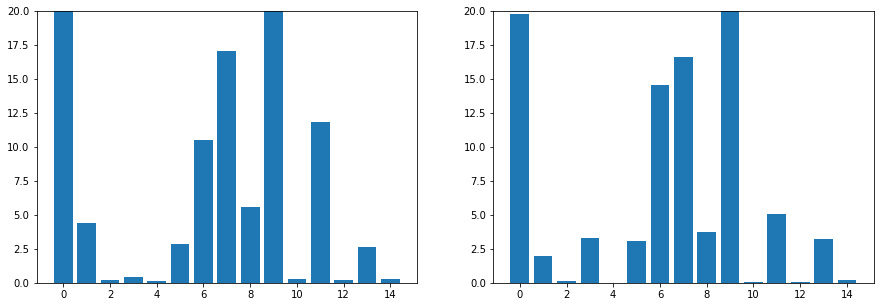

In [23]:
avg_topics_all = get_topics(corpus_all, dictionary_all, corpus_by_year, num_topics=15)

In [30]:
get_largest_popularity_shifts(avg_topics_all, num_topics=15)

2021-04-26 10:06:26,801 : INFO : loading LdaModel object from /work/ms5941/NLP/Temp/GDP/GDP_LDA_model_15_25_400_auto_auto
2021-04-26 10:06:26,804 : INFO : loading expElogbeta from /work/ms5941/NLP/Temp/GDP/GDP_LDA_model_15_25_400_auto_auto.expElogbeta.npy with mmap=None
2021-04-26 10:06:26,806 : INFO : setting ignored attribute dispatcher to None
2021-04-26 10:06:26,807 : INFO : setting ignored attribute id2word to None
2021-04-26 10:06:26,808 : INFO : setting ignored attribute state to None
2021-04-26 10:06:26,809 : INFO : LdaModel lifecycle event {'fname': '/work/ms5941/NLP/Temp/GDP/GDP_LDA_model_15_25_400_auto_auto', 'datetime': '2021-04-26T10:06:26.809536', 'gensim': '4.0.1', 'python': '3.7.7 (default, May  7 2020, 21:25:33) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-16-amd64-x86_64-with-debian-10.9', 'event': 'loaded'}
2021-04-26 10:06:26,810 : INFO : loading LdaState object from /work/ms5941/NLP/Temp/GDP/GDP_LDA_model_15_25_400_auto_auto.state
2021-04-26 10:06:26,812 : INFO : LdaS

Top upward shifts in popularity (2019 to 2020)


,0,1,2,3,4,5,6,7,8,9,10,11
1,fiscal,double,claims,est,stock,tax,mln,linkreuterscom,price,target,time,spending
2,indicators,asian,equity,live,canada,phone,basic,pages,dbt,front,japan,editor
3,yen,high,futures,cents,traders,euro,low,currency,crude,trading,demand,japanese
4,meeting,president,link,annual,federal,washington,united,reserve,diary,london,international,time
5,wheat,corn,grain,chicago,river,usda,points,south,basis,export,gulf,season


2021-04-26 10:06:26,865 : INFO : loading LdaModel object from /work/ms5941/NLP/Temp/GDP/GDP_LDA_model_15_25_400_auto_auto
2021-04-26 10:06:26,867 : INFO : loading expElogbeta from /work/ms5941/NLP/Temp/GDP/GDP_LDA_model_15_25_400_auto_auto.expElogbeta.npy with mmap=None
2021-04-26 10:06:26,869 : INFO : setting ignored attribute dispatcher to None
2021-04-26 10:06:26,869 : INFO : setting ignored attribute id2word to None
2021-04-26 10:06:26,869 : INFO : setting ignored attribute state to None
2021-04-26 10:06:26,870 : INFO : LdaModel lifecycle event {'fname': '/work/ms5941/NLP/Temp/GDP/GDP_LDA_model_15_25_400_auto_auto', 'datetime': '2021-04-26T10:06:26.870279', 'gensim': '4.0.1', 'python': '3.7.7 (default, May  7 2020, 21:25:33) \n[GCC 7.3.0]', 'platform': 'Linux-4.19.0-16-amd64-x86_64-with-debian-10.9', 'event': 'loaded'}
2021-04-26 10:06:26,870 : INFO : loading LdaState object from /work/ms5941/NLP/Temp/GDP/GDP_LDA_model_15_25_400_auto_auto.state
2021-04-26 10:06:26,874 : INFO : LdaS

Top downward shifts in popularity (2019 to 2020)


,0,1,2,3,4,5,6,7,8,9,10,11
1,asia,index,usd,emerging,price,eci,brazil,europe,middle,asian,east,stocks
2,commodity,int,headlines,live,minute,view,usda,available,versions,bridgestation,stories,nikkei
3,billion,business,shares,deal,share,company,group,based,firm,industry,stock,buy
4,rating,bond,ratings,yield,treasury,tax,fitch,notes,spending,term,consumer,report
5,codes,nymex,brent,guide,metals,reports,gro,paper,report,mtl,cash,tables
